## Conjugate gradient methods

These are iterative methods wihch are used to find $\mathbf{x}$ which minimises $A\mathbf{x} = \mathbf{b}$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Conjugate gradient descent 

In [18]:
def conjugate_gradient(A, b, x, r_tol=1e-2, verbose=False):
    r = b - np.dot(A, x)
    p = np.copy(r)
    alpha=np.dot(r, r)/np.dot(p, np.dot(A, p))
    trace = list()
    trace.append(x)
    c=1
    while np.linalg.norm(r) > r_tol:
        if verbose: print('iter: {0}  e: {1}'.format(c, np.linalg.norm(r)))
        alpha = np.dot(r, r)/np.dot(p, np.dot(A, p))
        x = x + alpha*p
        trace.append(x)
        r_next = r - alpha*np.dot(A, p)
        beta = np.dot(r_next, r_next)/np.dot(r, r)
        p = r_next + beta*p
        r = r_next  
        c = c + 1
    if verbose: print('iter: {0}  e: {1}'.format(c, np.linalg.norm(r)))
    if verbose: print('finshed')
    return x, trace

In [19]:
def steepest_descent(A, b, x, r_tol=1e-2, verbose=False):
    r = b - np.dot(A, x)
    trace = list()
    trace.append(x)
    c=1
    while np.linalg.norm(r) > r_tol:
        if verbose: print('iter: {0}  e: {1}'.format(c, np.linalg.norm(r)))
        alpha=np.dot(r, r)/np.dot(r, np.dot(A, r))
        x = x + alpha*r
        trace.append(x)
        r = b - np.dot(A, x)
        c = c + 1
    if verbose: print('iter: {0}  e: {1}'.format(c, np.linalg.norm(r)))
    if verbose: print('finshed')
    return x, trace
    

In [3]:
def quadratic_function(x, A, b):
    """  xTAx -bTx"""
    return np.sum(np.multiply(x, np.dot(A, x)), 0) - np.dot(np.transpose(x), b)

In [4]:
def get_plot_data(f):
    p = np.linspace(-10,10, 100)
    X, Y = np.meshgrid(p, p)
    x = np.array([X.flatten(), Y.flatten()])
    z = f(x)
    Z = z.reshape(X.shape)
    return X, Y, Z
    
def plot_trace(plt, trace):
    for i in range(1, len(trace)):
        line = np.vstack((trace[i-1],trace[i]))
        plt.plot(line[:, 0], line[:, 1], '--k')
        

### Initialise the objective function with its parameters

In [14]:
A = np.array([[3, 2], [2, 6]], dtype=float)
b = np.array([2, -8], dtype=float)
f = lambda x: quadratic_function(x, A, b)

### Optimize objective function

In [20]:
x0 = np.array([-10, -5], dtype=float)
xf, trace = conjugate_gradient(A, b, x0, r_tol=1e-4, verbose=True)

iter: 1  e: 59.3969696197
iter: 2  e: 13.7069929892
iter: 3  e: 3.5527136788e-15
finshed


In [21]:
x0 = np.array([-10, -5], dtype=float)
xf, trace = steepest_descent(A, b, x0, r_tol=1e-4, verbose=True)

iter: 1  e: 59.3969696197
iter: 2  e: 13.7069929892
iter: 3  e: 8.22419579349
iter: 4  e: 1.89789133696
iter: 5  e: 1.13873480218
iter: 6  e: 0.262784954348
iter: 7  e: 0.157670972609
iter: 8  e: 0.0363856090636
iter: 9  e: 0.0218313654382
iter: 10  e: 0.00503800740881
iter: 11  e: 0.00302280444529
iter: 12  e: 0.000697570256605
iter: 13  e: 0.000418542153964
iter: 14  e: 9.65866509138e-05
finshed


### Plot objective function and result

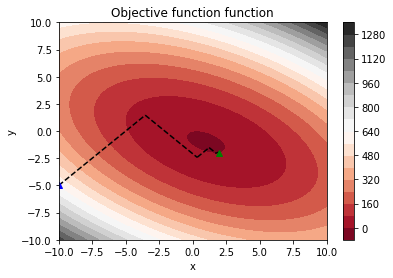

In [16]:

X, Y, Z = get_plot_data(f)

plt.figure()
plt.title('Objective function function')

plt.contourf(X, Y, Z, 20,  cmap='RdGy');
plt.colorbar();

plot_trace(plt, trace)
plt.plot(x0[0], x0[1], 'b^')
plt.plot(xf[0], xf[1], 'g^')


plt.axis(aspect='image');
plt.xlabel('x')
plt.ylabel('y')
plt.show()


### Isotropic objective function test

In [12]:
x0 = np.array([10, 10], dtype=float)
A = np.eye(2)
b = np.zeros(2)
xf, trace = conjugate_gradient(A, b, x0, r_tol=1e-4, verbose=True)

iter: 1  e: 14.1421356237
1.0
iter: 2  e: 0.0
finshed
